# Natural Computing - Assignment 2 
Group 13

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Set working directory

In [2]:
def run_java_command(command, print_output=False):
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if print_output:
        print("Command:", command)
        print("Error:", result.stderr.strip())
        print("Output:", result.stdout.strip())
    return result.stdout.strip()

#set the input path to the negative-selection folder
INPUT_PATH = '/Users/ringo/Library/CloudStorage/GoogleDrive-jasperpieterse12@gmail.com/Other computers/Desktop/Desktop/Physicss/Natural Computing/Natural-Computing/Assignment 2/negative-selection/'

#intialize working directory
run_java_command(f"cd '{INPUT_PATH}'", print_output = True)

Command: cd '/Users/ringo/Library/CloudStorage/GoogleDrive-jasperpieterse12@gmail.com/Other computers/Desktop/Desktop/Physicss/Natural Computing/Natural-Computing/Assignment 2/negative-selection/'
Error: 
Output: 


''

### Define Helper Functions

In [3]:
# Function to compute the sensitivity and specificity between two languages
def compute_sens_spec_lang(language1, language2): 
    '''
    This function computes the sensitivity and specificity between two languages.

    '''
    language1 = np.array([language1, [0] * len(language1)])
    language2 = np.array([language2, [1] * len(language2)])
    
    data = np.hstack([language1, language2])
    
    data = data[:, np.argsort(data[0, :])]

    cutoff_points = np.unique(data[0, :])
    cutoff_points = np.append(cutoff_points, max(cutoff_points)+1)

    sensitivity = []
    specificity = []
    
    for cutoff_point in cutoff_points:
        cutoff_index = np.where(data[0,:] == cutoff_point)[0]
              
        if len(cutoff_index) == 0:
            cutoff_index = [data.shape[1]] 
        
        sensitivity.append((data[1,cutoff_index[0]:] == 1).sum() / (data[1] == 1).sum())
        specificity.append((data[1,:cutoff_index[0]] == 0).sum() / (data[1] == 0).sum())

    return sensitivity, specificity

def integrate(coord_x, coord_y):
    '''
    This function calculates the area under the curve defined by the points (coord_x, coord_y).
    '''
    area = 0
    for i in range(1, len(coord_x)):
        delta_x = coord_x[i] - coord_x[i-1]
        area += delta_x * (coord_y[i-1] + coord_y[i]) / 2

    return area

## Language Experiment

AUC SCORE FOR r = 1 IS:  0.5435347184253692
AUC SCORE FOR r = 2 IS:  0.7396459814106062
AUC SCORE FOR r = 4 IS:  0.7916097138691455


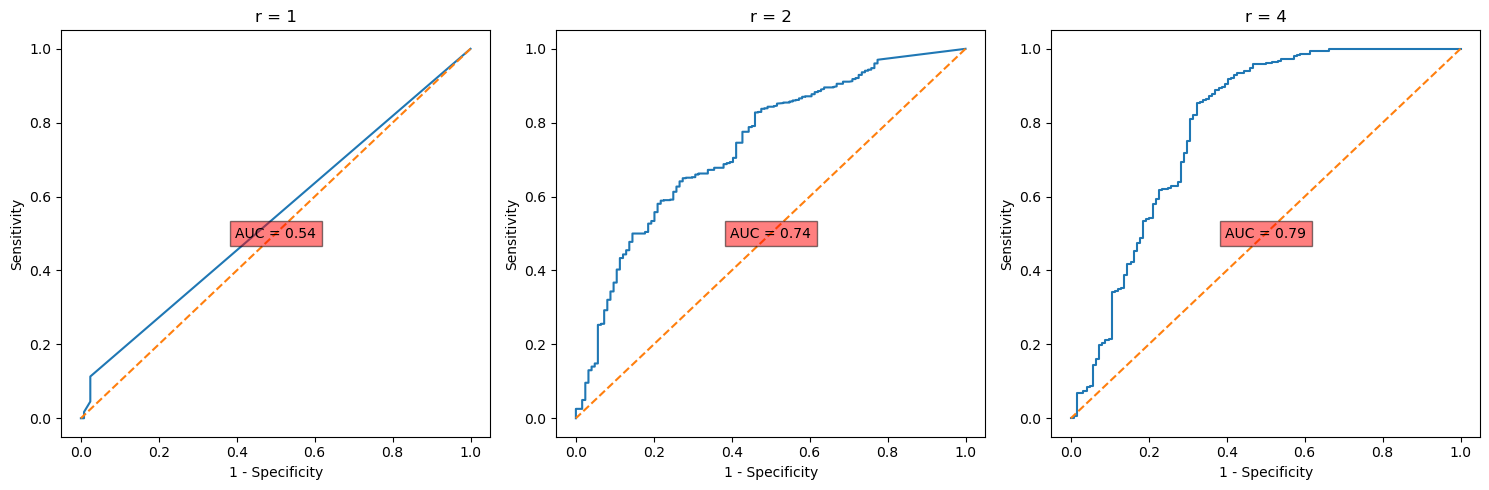

In [4]:
# making the subplot for 3 values of r
r_values = [1, 2, 4]
AUC_values = []
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, r in enumerate(r_values):
    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c  < english.test")
    output_tagalog_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c  < tagalog.test")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    tagalog_test_values = list(map(float, output_tagalog_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sens_spec_lang(english_test_values, tagalog_test_values)

    # Calculate AUC
    auc_score = integrate(np.asarray(specificity), sensitivity) 
    AUC_values.append(auc_score)
    print(f"AUC SCORE FOR r = {r} IS: ", auc_score)

    # Plot
    axs[i].plot(1-np.asarray(specificity), sensitivity)
    axs[i].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i].set_xlabel("1 - Specificity")
    axs[i].set_ylabel("Sensitivity")
    axs[i].set_title(f"r = {r}")
    axs[i].text(0.5, 0.5, f"AUC = {auc_score:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.savefig("Curves.png")
plt.show()

AUC SCORE FOR r = 1 IS:  0.5435347184253692
AUC SCORE FOR r = 2 IS:  0.7396459814106062
AUC SCORE FOR r = 3 IS:  0.8311235647895026
AUC SCORE FOR r = 4 IS:  0.7916097138691455
AUC SCORE FOR r = 5 IS:  0.7282440313468197
AUC SCORE FOR r = 6 IS:  0.6680847913249499
AUC SCORE FOR r = 7 IS:  0.5907258064516129
AUC SCORE FOR r = 8 IS:  0.5201612903225806
AUC SCORE FOR r = 9 IS:  0.5120967741935484


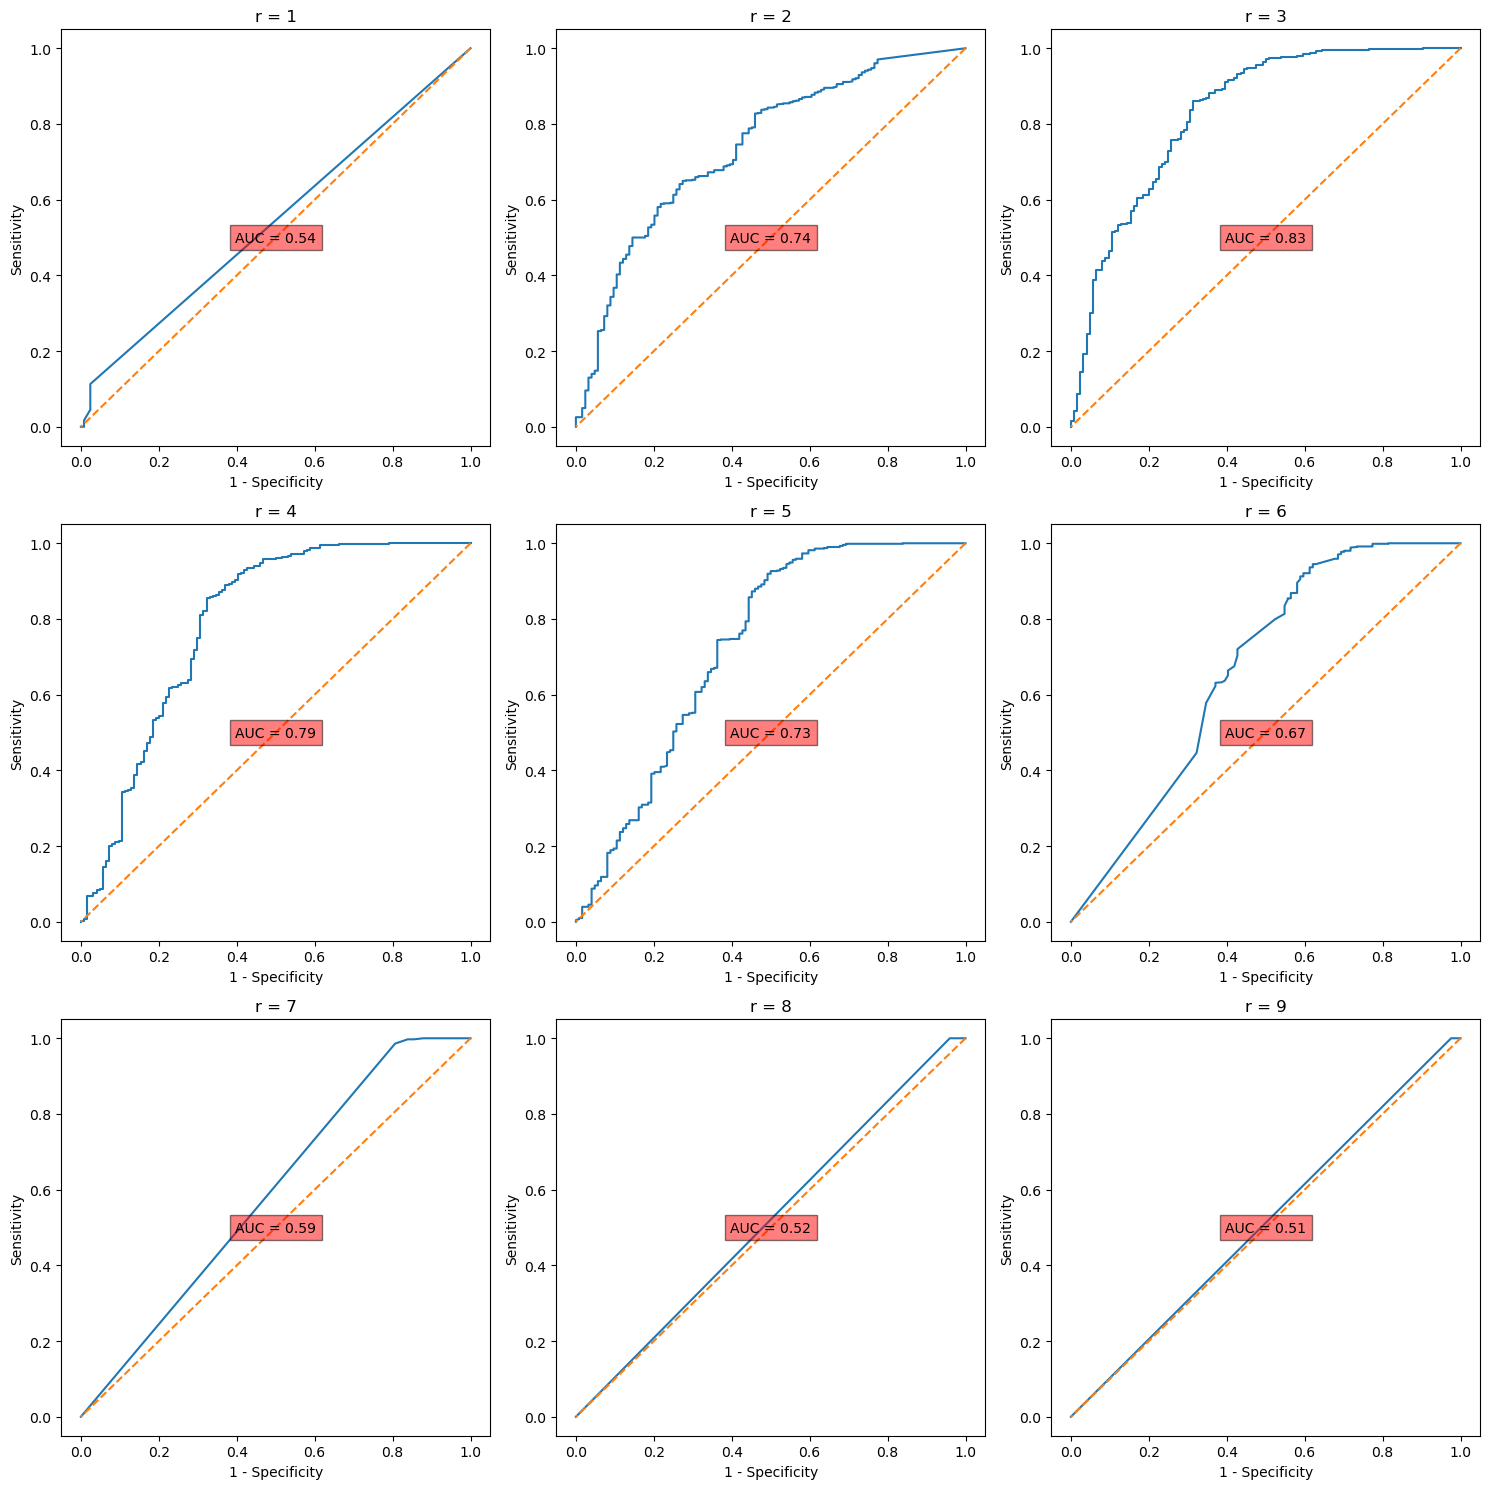

In [5]:
# making the subplot for 9 values of r
r_values = list(range(1, 10))
AUC_values = []
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, r in enumerate(r_values):
    # Train the data
    training_command = f"java -jar negsel2.jar -alphabet file://english.train -self english.train -n 10 -r {r} -c"
    run_java_command(training_command)

    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < english.test")
    output_tagalog_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < tagalog.test")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    tagalog_test_values = list(map(float, output_tagalog_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sens_spec_lang(english_test_values, tagalog_test_values)

    # Calculate AUC
    auc_score = integrate(np.asarray(specificity), sensitivity) 
    AUC_values.append(auc_score)
    print(f"AUC SCORE FOR r = {r} IS: ", auc_score)

    # Plot
    axs[i//3, i%3].plot(1-np.asarray(specificity), sensitivity)
    axs[i//3, i%3].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i//3, i%3].set_xlabel("1 - Specificity")
    axs[i//3, i%3].set_ylabel("Sensitivity")
    axs[i//3, i%3].set_title(f"r = {r}")
    axs[i//3, i%3].text(0.5, 0.5, f"AUC = {auc_score:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i//3, i%3].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.savefig("Curves_9.png")
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.5435347184253692, 0.7396459814106062, 0.8311235647895026, 0.7916097138691455, 0.7282440313468197, 0.6680847913249499, 0.5907258064516129, 0.5201612903225806, 0.5120967741935484]


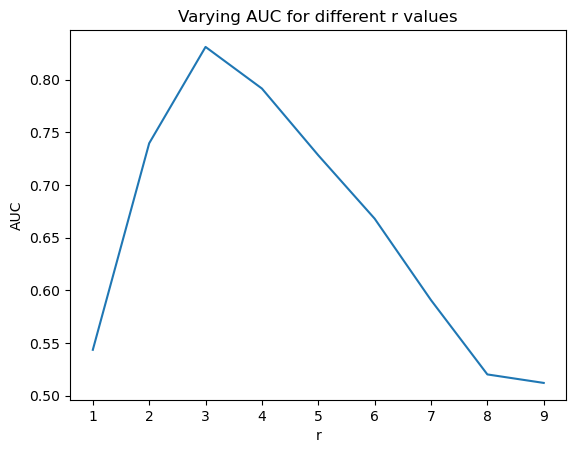

In [6]:
print(r_values)
print(AUC_values)

plt.plot(r_values, AUC_values)
plt.xlabel("r")
plt.ylabel("AUC")
plt.title("Varying AUC for different r values")
plt.show()

AUC SCORE for hiligaynon IS:  0.8397419354838703
AUC SCORE for middle-english IS:  0.5424435483870965
AUC SCORE for plautdietsch IS:  0.7746774193548389
AUC SCORE for xhosa IS:  0.8893387096774199


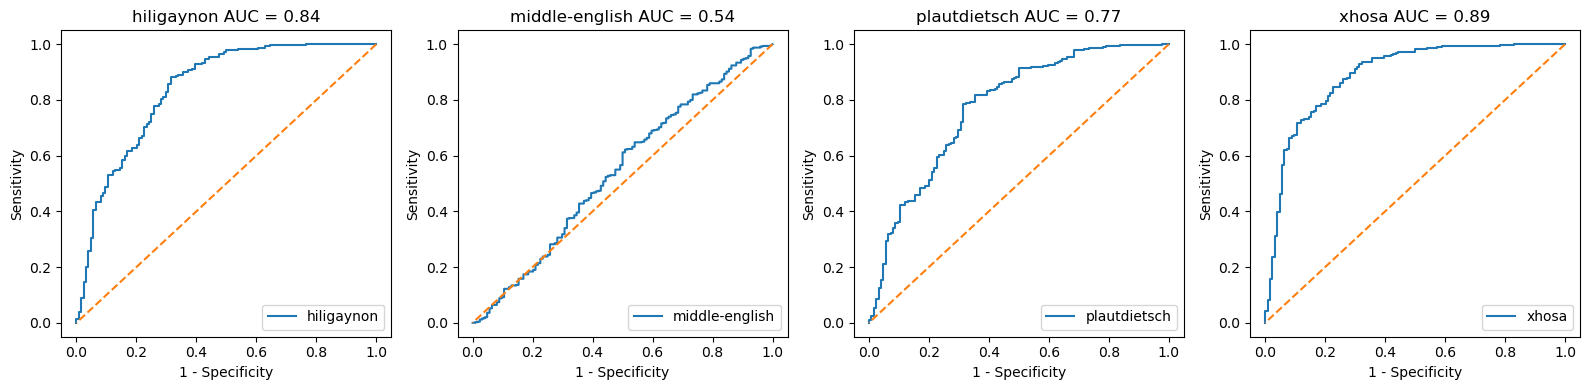

In [7]:
# Loading the other languages as well
languages = ["hiligaynon", "middle-english", "plautdietsch", "xhosa"]
r = 3

all_sensitivity = []
all_specificity = []

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, lang in enumerate(languages):
    training_command = f"java -jar negsel2.jar -alphabet file://english.train -self english.train -n 10 -r {r} -c"
    run_java_command(training_command)
    
    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < english.test")
    output_lang_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < lang/{lang}.txt")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    lang_test_values = list(map(float, output_lang_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sens_spec_lang(english_test_values, lang_test_values)
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)

    # Calculate AUC
    auc_score = integrate(np.asarray(specificity), sensitivity) 

    print(f"AUC SCORE for {lang} IS: ", auc_score)
    
    # Plotting
    axs[i].plot(1-np.asarray(specificity), sensitivity, label=f"{lang}")
    axs[i].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i].set_xlabel("1 - Specificity")
    axs[i].set_ylabel("Sensitivity")
    axs[i].legend(loc="lower right")
    axs[i].set_title(f"{lang} AUC = {auc_score:.2f}")

plt.tight_layout()
plt.savefig("other_languages.png")  
plt.show()

# Linux Experiment

### Preprocessing functions


In [8]:
def process_train(train_file, output_file, n =10):
    """Reads a train file and writes it to another train file in chunks of n characters."""
    # Read the input train file
    with open(train_file, 'r') as file:
        train_text = file.read()

    #set length n
    chunk_size = n
    chunks = []
    current_chunk = ''

    for char in train_text:
        current_chunk += char
        if char == '\n' or len(current_chunk) == chunk_size:
            # Fill the rest of the chunk with spaces if it's the end of a sentence but not full
            current_chunk = current_chunk.ljust(chunk_size)
            chunks.append(current_chunk)
            current_chunk = ''
    
    # Handle the last chunk if it's not empty and not a full chunk
    if current_chunk:
        chunks.append(current_chunk.ljust(chunk_size))

    # Write the chunks to the output text file
    with open(output_file, 'w') as file:
        for chunk in chunks:
            file.write(chunk + '\n')

def process_test(test_file, label_file, output_file_0, output_file_1, n = 10):
    """Reads a test file and its corresponding labels"""
    # Read the input text file
    with open(test_file, 'r') as file:
        test_text = file.read()

    # Read the input labels file and convert to integers list
    with open(label_file, 'r') as file:
        labels = file.read().splitlines()
        labels = list(map(int, labels))

    #set length n
    chunk_size = n

    #initialize arrays
    chunks_0 = []
    chunks_1 = []

    #initialize variables
    current_chunk = ''
    current_row   = 0
    current_label = labels[current_row]

    # Select all chunks belonging to a single label and save those to a separate file
    for char in test_text:
        current_chunk += char
        if char == '\n' or len(current_chunk) == chunk_size:
            # Fill the rest of the chunk with spaces if it's the end of a sentence but not full
            current_chunk = current_chunk.ljust(chunk_size)

            # Save the chunk to the labbeled array
            if current_label == 0:
                chunks_0.append(current_chunk)
            else:
                chunks_1.append(current_chunk)

            # Reset the current chunk
            current_chunk = ''

        #If new line, read the label of that line
        if char == '\n':
            if current_row > len(labels) - 2:
                break
            current_row += 1
            current_label = labels[current_row]
    
    # Handle the last chunk if it's not empty and not a full chunk
    if current_chunk:
        if current_label == 0:
            chunks_0.append(current_chunk.ljust(chunk_size))
        else:
            chunks_1.append(current_chunk.ljust(chunk_size))

    # Write the chunks to the output text file
    with open(output_file_0, 'w') as file:
        for chunk in chunks_0:
            file.write(chunk + '\n')
    
    with open(output_file_1, 'w') as file:
        for chunk in chunks_1:
            file.write(chunk + '\n')       


### Training and specificty functions

In [14]:
def run_training_test(base_filename, test_index, n, r):
    """Runs the training process and captures output for a given test file."""
    training_command = f"java -jar negsel2.jar -alphabet file://syscalls/snd-cert/snd-cert.alpha -self snd-cert_preprocessed.train -n {n} -r {r} -c -l"
    test_output = run_java_command(f"{training_command} < {base_filename}_preprocessed_{test_index}.test")
    return list(map(float, test_output.split()))

def compute_sens_spec(base_filename, test_data, label_index):
    """Calculates sensitivity and specificity.
    """
    positive_data = test_data[base_filename] 
    negative_data = np.concatenate([values for key, values in test_data.items() if f'_{label_index}' not in key])

    all_data = np.concatenate([positive_data, negative_data])
    cutoff_points = np.unique(all_data)
    cutoff_points = np.append(cutoff_points, max(cutoff_points) + 1)

    sensitivity = []
    specificity = []

    for cutoff_point in cutoff_points:
        true_positives = np.sum(positive_data >= cutoff_point)
        false_negatives = np.sum(positive_data < cutoff_point)
        true_negatives = np.sum(negative_data < cutoff_point)
        false_positives = np.sum(negative_data >= cutoff_point)

        sensitivity.append(true_positives / (true_positives + false_negatives))
        specificity.append(true_negatives / (true_negatives + false_positives))

    return sensitivity, specificity

### Main execution for single variable n and r

In [12]:
# Set parameters
n = 10
r = 3
test_data = {}  # Dictionary to store inference output

# Pre-process the training data
train_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.train' #change / to \\ for Windows
output_file = 'snd-cert_preprocessed.train'

process_train(train_file, output_file, n = n)

# Store the pre-processed chunks for later use
with open('snd-cert_preprocessed.train', 'r') as file:
        train_text_processed = file.read().splitlines()

# Pre-process the testing data
test_files_array  = ['snd-cert.1','snd-cert.2', 'snd-cert.3']
for file_name in test_files_array:
    test_file     = f"{INPUT_PATH}syscalls/snd-cert/{file_name}.test"  #change / to \\ for Windows
    label_file    = f"{INPUT_PATH}syscalls/snd-cert/{file_name}.labels"  #change / to \\ for Windows
    output_file_0 = f"{file_name}_preprocessed_0.test"
    output_file_1 = f"{file_name}_preprocessed_1.test"
    
    process_test(test_file, label_file, output_file_0, output_file_1, n = n)
    

#Main execution: Train the negsel algorithm for each test set, store results in dictionary
for i in range(1, 4):  # Loop through test sets
     for j in range(2):  # Loop for 0 and 1 
         key = f"test{i}_{j}_values"
         test_data[key] = np.array(run_training_test(f"snd-cert.{i}", j, n = n, r = r))
         test_data[key] = test_data[key][~np.isnan(test_data[key])]  # Filter NaN values due to empty lines out

#Print data information
print(f"Using n = {n} and r = {r}")
print(f"The training data has {len(train_text_processed)} chunks")
print(f"The 1st test data has {len(test_data['test1_0_values']) + len(test_data['test1_1_values'])} chunks of which {len(test_data['test1_0_values'])} are safe chunks and {len(test_data['test1_1_values'])} are compromised chunks")
print(f"The 2nd test data has {len(test_data['test2_0_values']) + len(test_data['test2_1_values'])} chunks of which {len(test_data['test2_0_values'])} are safe chunks and {len(test_data['test2_1_values'])} are compromised chunks")
print(f"The 3rd test data has {len(test_data['test3_0_values']) + len(test_data['test3_1_values'])} chunks of which {len(test_data['test3_0_values'])} are safe chunks and {len(test_data['test3_1_values'])} are compromised chunks")

Using n = 10 and r = 3
The training data has 72136 chunks
The 1st test data has 4614 chunks of which 4138 are safe chunks and 476 are compromised chunks
The 2nd test data has 43332 chunks of which 42852 are safe chunks and 480 are compromised chunks
The 3rd test data has 87406 chunks of which 86935 are safe chunks and 471 are compromised chunks


### Grid search over n and r 

AUC score for good chunks for n = 5 and r = 3 is  :  0.3310014215871657
AUC score for faulty chunks for n = 5 and r = 3 is:  0.6689985784128344
AUC score for good chunks for n = 5 and r = 4 is  :  0.3195243074698634
AUC score for faulty chunks for n = 5 and r = 4 is:  0.6804756925301365
AUC score for good chunks for n = 5 and r = 5 is  :  0.319484249391345
AUC score for faulty chunks for n = 5 and r = 5 is:  0.680515750608655
AUC score for good chunks for n = 10 and r = 3 is  :  0.23781735990674668
AUC score for faulty chunks for n = 10 and r = 3 is:  0.7621826400932533
AUC score for good chunks for n = 10 and r = 4 is  :  0.2325543436320879
AUC score for faulty chunks for n = 10 and r = 4 is:  0.7674456563679121
AUC score for good chunks for n = 10 and r = 5 is  :  0.23254368204507514
AUC score for faulty chunks for n = 10 and r = 5 is:  0.7674563179549249
AUC score for good chunks for n = 15 and r = 3 is  :  0.21841380800706553
AUC score for faulty chunks for n = 15 and r = 3 is:  0.

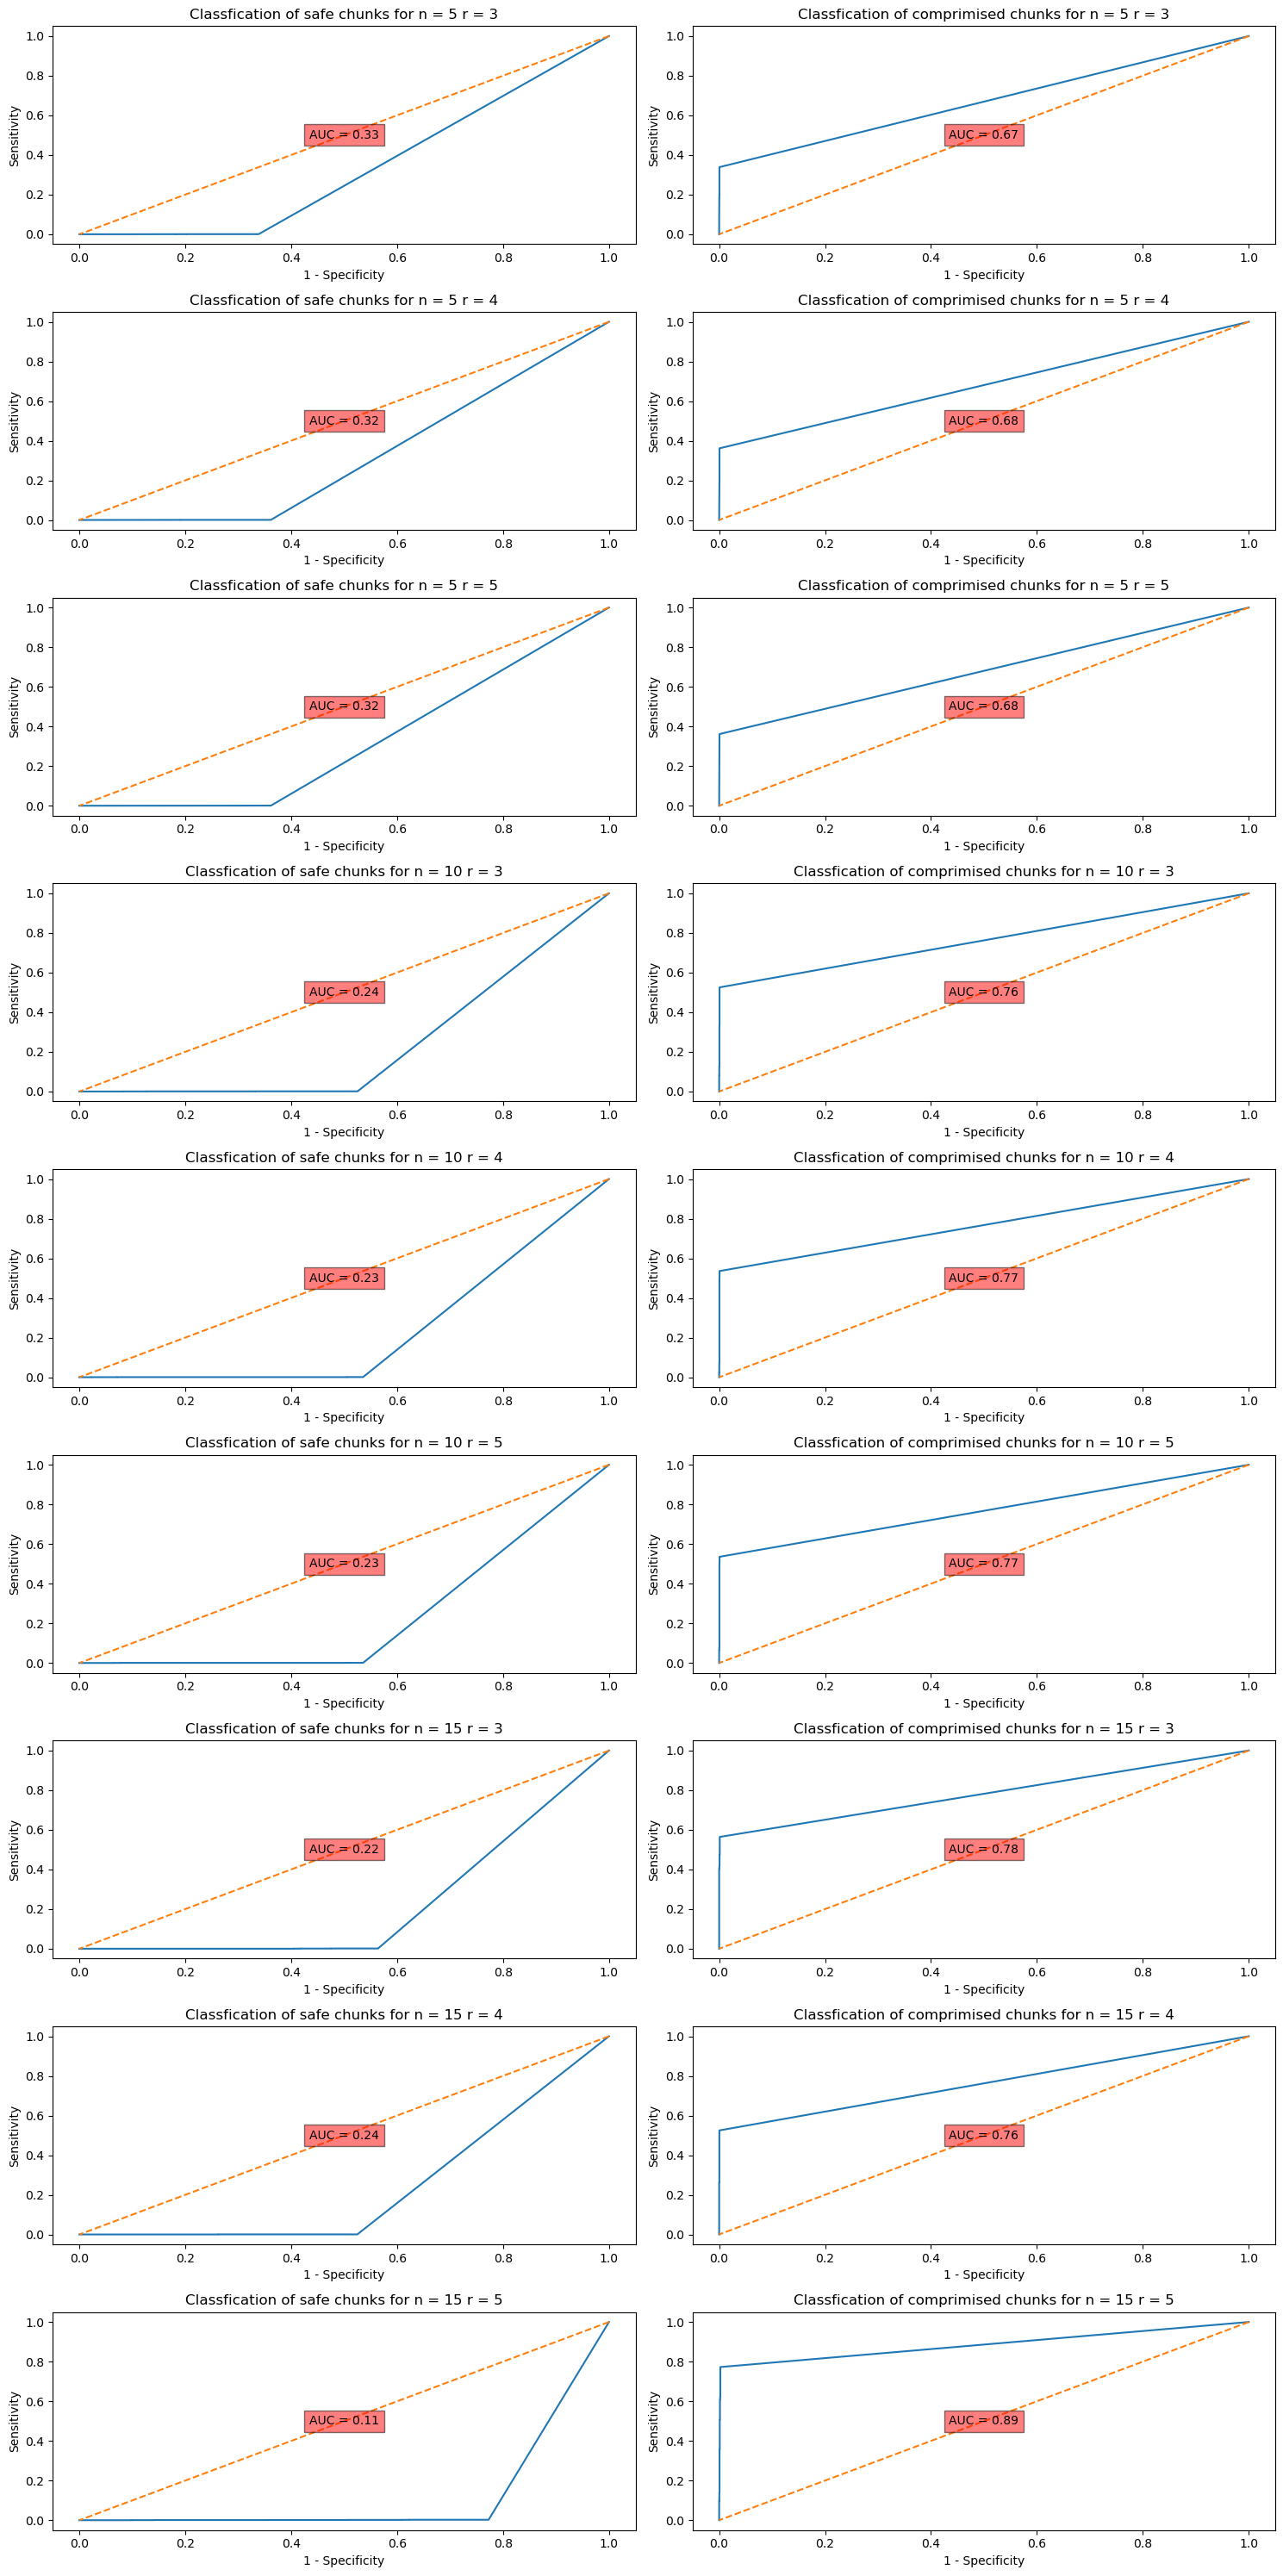

In [42]:
n_values    = [5, 10, 15]
r_values    = [3, 4, 5]
test_set_nr = 1
i = 0

fig, axs = plt.subplots(9, 2, figsize=(15, 30))

for n in n_values:
    for r in (r_values):
        test_data = {}  # Dictionary to store inference output

        # Pre-process the training data
        train_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.train' #change / to \\ for Windows
        output_file = 'snd-cert_preprocessed.train'
        process_train(train_file, output_file, n = n)

        # Pre-process the testing data
        test_files_array = ['snd-cert.1','snd-cert.2', 'snd-cert.3']
        for file_name in test_files_array:
            test_file = f"{INPUT_PATH}syscalls/snd-cert/{file_name}.test"     #change / to \\ for Windows
            label_file = f"{INPUT_PATH}syscalls/snd-cert/{file_name}.labels"  #change / to \\ for Windows
            output_file_0 = f"{file_name}_preprocessed_0.test"
            output_file_1 = f"{file_name}_preprocessed_1.test"

            process_test(test_file, label_file, output_file_0, output_file_1, n = n)


        #Train the negsel algorithm for each test set, store results in dictionary
        for j in range(2):  # Loop for 0 and 1 labels
             key = f"test{test_set_nr}_{j}_values"
             test_data[key] = np.array(run_training_test(f"snd-cert.{test_set_nr}", j, n = n, r = r))
             test_data[key] = test_data[key][~np.isnan(test_data[key])]  # Filter NaN values due to empty lines out

        # Calculating Selectivity and Specificity
        sensitivity_0, specificity_0 = compute_sens_spec(f"test{test_set_nr}_0_values",test_data, 0)
        sensitivity_1, specificity_1 = compute_sens_spec(f"test{test_set_nr}_1_values",test_data, 1)  

        # Calculate AUC
        auc_score_0 = integrate(np.asarray(specificity_0), sensitivity_0) 
        auc_score_1 = integrate(np.asarray(specificity_1), sensitivity_1) 

        print(f"AUC score for good chunks for n = {n} and r = {r} is  : ", auc_score_0)
        print(f"AUC score for faulty chunks for n = {n} and r = {r} is: ", auc_score_1)

        # Plot safe chunks
        axs[i][0].plot(1-np.asarray(specificity_0), sensitivity_0)
        axs[i][0].plot(1-np.asarray(specificity_0), 1-np.asarray(specificity_0), '--')
        axs[i][0].set_xlabel("1 - Specificity")
        axs[i][0].set_ylabel("Sensitivity")
        axs[i][0].set_title(f"Classfication of safe chunks for n = {n} r = {r}")
        axs[i][0].text(0.5, 0.5, f"AUC = {auc_score_0:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i][0].transAxes, bbox=dict(facecolor='red', alpha=0.5))

        # Plot faulty chunks
        axs[i][1].plot(1-np.asarray(specificity_1), sensitivity_1)
        axs[i][1].plot(1-np.asarray(specificity_1), 1-np.asarray(specificity_1), '--')
        axs[i][1].set_xlabel("1 - Specificity")
        axs[i][1].set_ylabel("Sensitivity")
        axs[i][1].set_title(f"Classfication of comprimised chunks for n = {n} r = {r}")
        axs[i][1].text(0.5, 0.5, f"AUC = {auc_score_1:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i][1].transAxes, bbox=dict(facecolor='red', alpha=0.5))
        
        i += 1
        
plt.tight_layout()
plt.savefig("Curves_Linux.png")
plt.show()